In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [9]:
df_station = pd.read_csv("../data/wind_farms_with_station_climateID.csv")

In [19]:
df_station.head()

,name,project_type,capacity_MW,region,status,commissioning_date,latitude,longitude,index,climateID,longitude_station,latitude_station,distance_to_weather_station
0,Baie-des-Sables wind farm,Wind farm,109.50,Bas-Saint-Laurent,In service,2006-11-22,48.702210,-67.872489,41,7055122,-68.19,48.60,0.333557
1,Carleton wind farm,Wind farm,109.50,Gaspésie–Îles-de-la-Madel,In service,2008-11-22,48.202737,-66.128295,19,7051163,-65.32,49.25,1.322914
2,Mont-Rothery wind farm,Wind farm,74.00,Gaspésie–Îles-de-la-Madel,In service,2015-12-01,48.978875,-65.373544,19,7051163,-65.32,49.25,0.276362
3,De L'Érable wind farm,Wind farm,100.00,Centre-du-Québec,In service,2013-11-16,46.096983,-71.647639,7,7028442,-71.27,46.05,0.380550
4,Des Moulins wind farm,Wind farm,156.85,Chaudière-Appalaches,In service,2013-12-07,46.173945,-71.351327,7,7028442,-71.27,46.05,0.148245


In [11]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         55 non-null     object 
 1   project_type                 55 non-null     object 
 2   capacity_MW                  55 non-null     float64
 3   region                       55 non-null     object 
 4   status                       55 non-null     object 
 5   commissioning_date           55 non-null     object 
 6   latitude                     55 non-null     float64
 7   longitude                    55 non-null     float64
 8   index                        55 non-null     int64  
 9   climateID                    55 non-null     object 
 10  longitude_station            55 non-null     float64
 11  latitude_station             55 non-null     float64
 12  distance_to_weather_station  55 non-null     float64
dtypes: float64(6), int64(1

In [2]:
df_farms = pd.read_csv("../data/hydroquebec_wind_farms.csv")

In [21]:
df_farms.head()

,name,project_type,capacity_MW,region,status,commissioning_date,latitude,longitude
0,Baie-des-Sables wind farm,Wind farm,109.50,Bas-Saint-Laurent,In service,2006-11-22,48.702210,-67.872489
1,Carleton wind farm,Wind farm,109.50,Gaspésie–Îles-de-la-Madel,In service,2008-11-22,48.202737,-66.128295
2,Mont-Rothery wind farm,Wind farm,74.00,Gaspésie–Îles-de-la-Madel,In service,2015-12-01,48.978875,-65.373544
3,De L'Érable wind farm,Wind farm,100.00,Centre-du-Québec,In service,2013-11-16,46.096983,-71.647639
4,Des Moulins wind farm,Wind farm,156.85,Chaudière-Appalaches,In service,2013-12-07,46.173945,-71.351327


In [40]:
wtdf = pd.read_excel("../data/Wind_Turbine_Database_FGP.xlsx")
wtdf = wtdf[wtdf["Province_Territory"] == "Quebec"]

In [42]:
wtdf.head()

,Province_Territory,Province_Territoire,Project Name,Total Project Capacity (MW),Turbine Identifier,Turbine Number,Turbine Number in Project,Turbine Rated Capacity (kW),Rotor Diameter (m),Hub Height (m),Manufacturer,Model,Commissioning,Latitude,Longitude,Notes,Data Sources,Basemap
5326,Quebec,Québec,Baie-des-Sables,109.5,BDS1,1,1/73,1500,77.0,80,General Electric,GE 1.5SLE,2006,48.742788,-67.787075,NaN,"[24], [25], [26]",ESRI
5327,Quebec,Québec,Baie-des-Sables,109.5,BDS2,2,2/73,1500,77.0,80,General Electric,GE 1.5SLE,2006,48.742691,-67.797981,NaN,"[24], [25], [26]",ESRI
5328,Quebec,Québec,Baie-des-Sables,109.5,BDS3,3,3/73,1500,77.0,80,General Electric,GE 1.5SLE,2006,48.736124,-67.805939,NaN,"[24], [25], [26]",ESRI
5329,Quebec,Québec,Baie-des-Sables,109.5,BDS4,4,4/73,1500,77.0,80,General Electric,GE 1.5SLE,2006,48.739788,-67.793573,NaN,"[24], [25], [26]",ESRI
5330,Quebec,Québec,Baie-des-Sables,109.5,BDS5,5,5/73,1500,77.0,80,General Electric,GE 1.5SLE,2006,48.733394,-67.798989,NaN,"[24], [25], [26]",ESRI


In [3]:
df = pd.read_csv("../data/historique-production-electricite-quebec.csv")

In [4]:
df.head()

,Date,Hydroelectric,Wind,Other renewables,Solar,Thermal,Total
0,2023-01-01T00:30:00-05:00,21310.49,151.07,491.0,0.00,0.0,21952.56
1,2023-01-01T05:30:00-05:00,21405.29,679.07,582.0,0.00,0.0,22666.36
2,2023-01-01T06:30:00-05:00,21532.53,829.70,580.0,0.00,0.0,22942.23
3,2023-01-01T08:30:00-05:00,22478.89,863.91,578.0,0.08,0.0,23920.88
4,2023-01-01T11:30:00-05:00,23668.89,639.35,582.0,0.55,0.0,24890.79


In [5]:
df = df[["Date","Wind"]]

In [6]:
df['Date'] = pd.to_datetime(df['Date'])  
df = df.sort_values('Date') 

/tmp/ipykernel_6795/1703822551.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


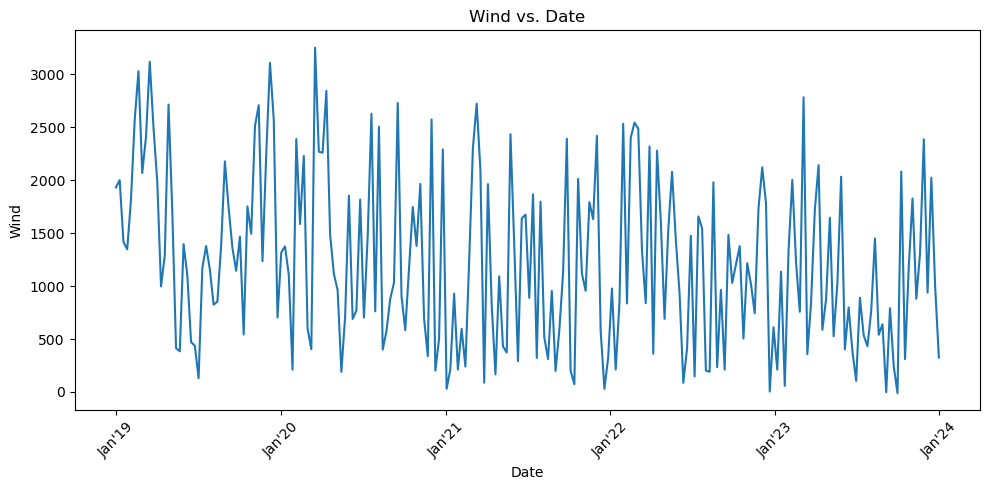

In [9]:
step = 200          # to select rows periodically
fig, ax = plt.subplots(figsize=(10, 5))         
ax.plot(df['Date'][0:-1:step], df['Wind'][0:-1:step])

# Format x-axis as "Jan'23"
date_format = mdates.DateFormatter("%b'%y")
ax.xaxis.set_major_formatter(date_format)

# Optional: rotate x-axis labels for clarity
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Wind")
plt.title("Wind vs. Date")

plt.tight_layout()
plt.show()


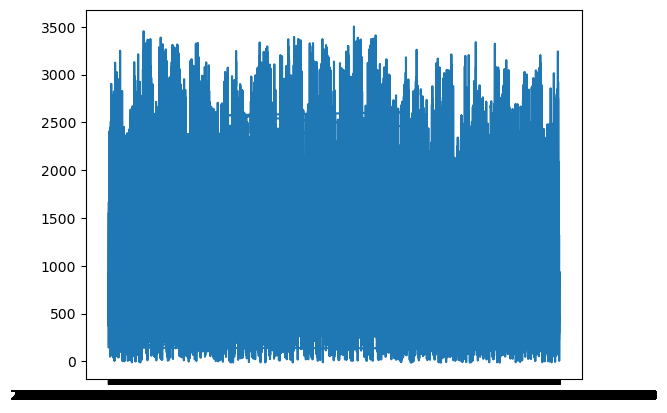

In [49]:
plt.plot(df.Date, df.Wind)